In [1]:
#install.packages('strucchange',repos = "http://cran.us.r-project.org")
#install.packages('svglite',repos = "http://cran.us.r-project.org")
#install.packages('rddtools',repos = "http://cran.us.r-project.org")
#install.packages('Rfast',repos = "http://cran.us.r-project.org")
#require(strucchange)
library(dplyr)
library(ggplot2)
require(svglite)
library(Rfast)
library(broom)
#install.packages('tseries')

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: svglite
Warning message:
"package 'svglite' was built under R version 3.6.3"Warning message:
"package 'Rfast' was built under R version 3.6.3"Loading required package: Rcpp
Loading required package: RcppZiggurat
Warning message:
"package 'RcppZiggurat' was built under R version 3.6.3"
Attaching package: 'Rfast'

The following object is masked from 'package:dplyr':

    nth



In [2]:
#install.packages('devtools', type = "win.binary")
library(devtools)
library(lmtest)

Warning message:
"package 'devtools' was built under R version 3.6.3"Loading required package: usethis
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [3]:
tags <- read.csv(file = 'temas_tiempo.csv',sep='\t',encoding='UTF-8')

In [4]:
tags

X,yearm,autoimagen,violencia,diversidad,desempeño,sentido,vinculares,emocion,total,autoimagenN,violenciaN,diversidadN,desempeñoN,sentidoN,vincularesN
0,2018-01,45,17,27,40,6,83,31,108,0.4166667,0.1574074,0.25000000,0.3703704,0.05555556,0.7685185
1,2018-02,19,14,20,22,2,55,24,75,0.2533333,0.1866667,0.26666667,0.2933333,0.02666667,0.7333333
2,2018-03,40,25,33,45,11,103,35,136,0.2941176,0.1838235,0.24264706,0.3308824,0.08088235,0.7573529
3,2018-04,59,33,32,78,13,147,61,200,0.2950000,0.1650000,0.16000000,0.3900000,0.06500000,0.7350000
4,2018-05,112,79,37,117,23,312,117,418,0.2679426,0.1889952,0.08851675,0.2799043,0.05502392,0.7464115
5,2018-06,62,35,37,71,17,170,60,219,0.2831050,0.1598174,0.16894977,0.3242009,0.07762557,0.7762557
6,2018-07,56,35,33,49,17,123,41,159,0.3522013,0.2201258,0.20754717,0.3081761,0.10691824,0.7735849
7,2018-08,51,31,49,56,4,119,44,154,0.3311688,0.2012987,0.31818182,0.3636364,0.02597403,0.7727273
8,2018-09,81,33,51,75,13,165,68,212,0.3820755,0.1556604,0.24056604,0.3537736,0.06132075,0.7783019
9,2018-10,107,46,67,100,17,211,82,294,0.3639456,0.1564626,0.22789116,0.3401361,0.05782313,0.7176871


In [5]:
dim(tags)

[1] 36 16

In [6]:
tags$emocionN <- tags$emocion/tags$total

### Vinculares

In [7]:
y <- tags$vincularesN

In [8]:
ttest2(y[1:26],y[27:36])
t.test(y[1:26],y[27:36])

stat       p-value           dof 
-6.286047e+00  8.547985e-07  2.796872e+01


	Welch Two Sample t-test

data:  y[1:26] and y[27:36]
t = -6.286, df = 27.969, p-value = 8.548e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06144932 -0.03124266
sample estimates:
mean of x mean of y 
0.7642606 0.8106066 


In [9]:
x= rep(0,36)
x[27:36]=1
fit = arima(y,order=c(1,0,0),xreg=x)

In [10]:
fit


Call:
arima(x = y, order = c(1, 0, 0), xreg = x)

Coefficients:
         ar1  intercept       x
      0.1262     0.7644  0.0457
s.e.  0.1647     0.0054  0.0101

sigma^2 estimated as 0.0005748:  log likelihood = 83.22,  aic = -158.44

In [51]:
(1-pnorm(abs(fit$coef)/sqrt(diag(fit$var.coef))))*2

ar1    intercept            x 
4.435040e-01 0.000000e+00 6.090989e-06

In [52]:
0.0457/0.0101
0.0463/0.0090

[1] 4.524752

[1] 5.144444

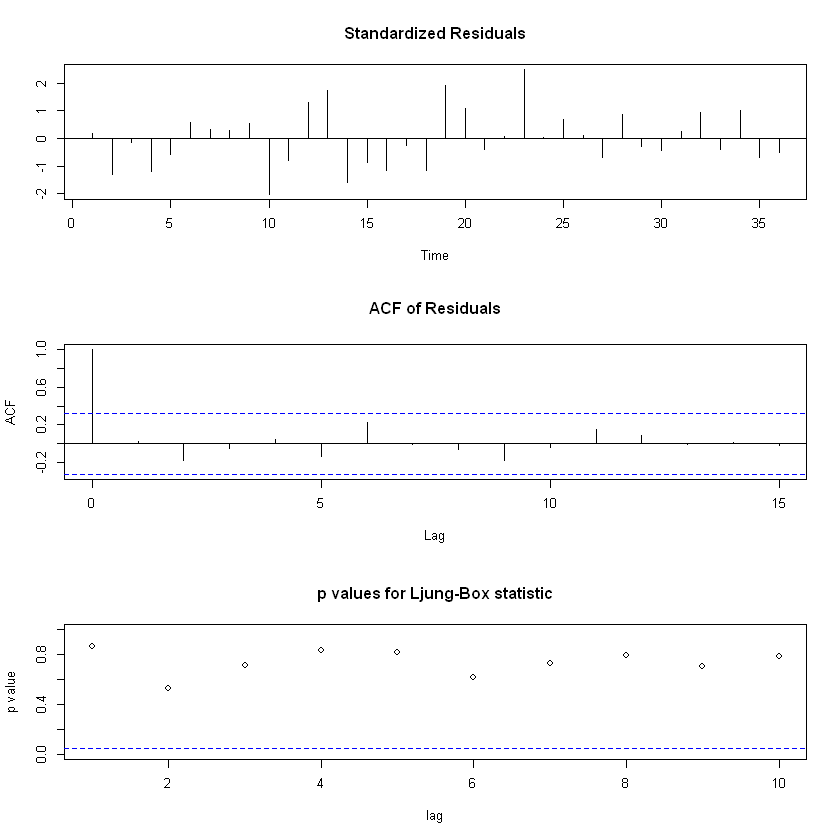

In [53]:
options(repr.plot.width=7, repr.plot.height=7)
tsdiag(fit)


#### Autoimagen

In [54]:
y <- tags$autoimagenN

In [55]:
ttest2(y[1:26],y[27:36])
t.test(y[1:26],y[27:36])

stat       p-value           dof 
-6.111072e+00  2.175009e-06  2.501978e+01


	Welch Two Sample t-test

data:  y[1:26] and y[27:36]
t = -6.1111, df = 25.02, p-value = 2.175e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.09460240 -0.04691161
sample estimates:
mean of x mean of y 
0.3141843 0.3849413 


In [56]:
x= rep(0,36)
x[27:36]=1
fit = arima(y,order=c(1,0,0),xreg=x)

In [57]:
fit


Call:
arima(x = y, order = c(1, 0, 0), xreg = x)

Coefficients:
         ar1  intercept       x
      0.1445     0.3154  0.0688
s.e.  0.1931     0.0084  0.0157

sigma^2 estimated as 0.001296:  log likelihood = 68.58,  aic = -129.15

In [58]:
(1-pnorm(abs(fit$coef)/sqrt(diag(fit$var.coef))))*2

ar1    intercept            x 
0.4542712403 0.0000000000 0.0000120089

In [59]:
0.0688/0.0157
0.0708/0.0135

[1] 4.382166

[1] 5.244444

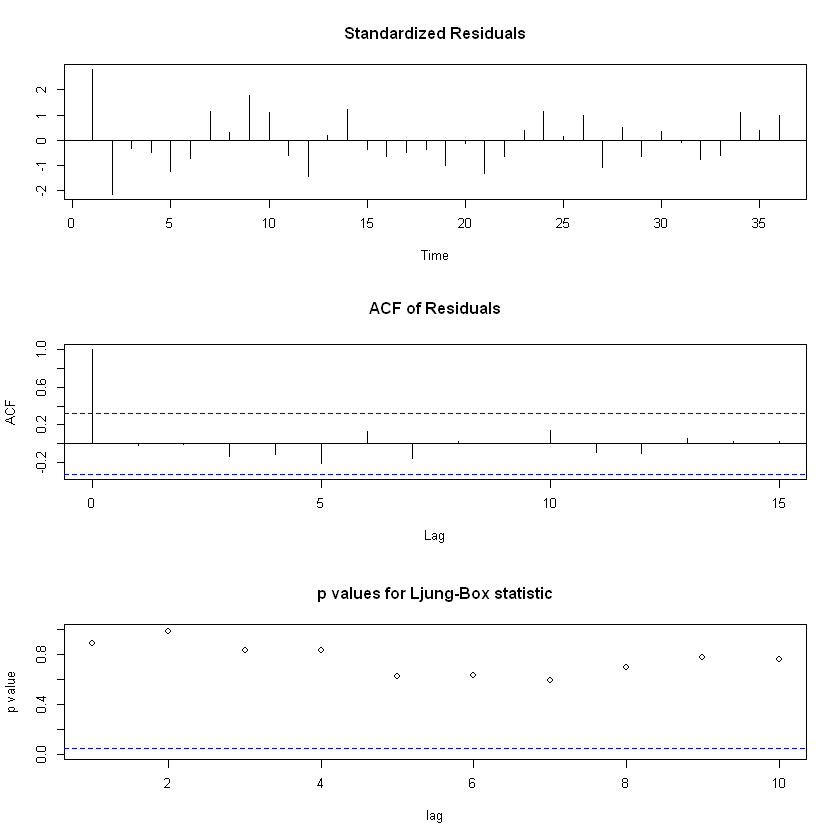

In [60]:
options(repr.plot.width=7, repr.plot.height=7)
tsdiag(fit)


#### Violencia

In [61]:
y <- tags$violenciaN

In [62]:
ttest2(y[1:26],y[27:36])
t.test(y[1:26],y[27:36])

stat    p-value        dof 
 0.7032267  0.4901244 19.7443999


	Welch Two Sample t-test

data:  y[1:26] and y[27:36]
t = 0.70323, df = 19.744, p-value = 0.4901
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01179383  0.02377494
sample estimates:
mean of x mean of y 
0.1601198 0.1541292 


In [63]:
x= rep(0,36)
x[27:36]=1
fit = arima(y,order=c(1,0,0),xreg=x)

In [64]:
fit


Call:
arima(x = y, order = c(1, 0, 0), xreg = x)

Coefficients:
         ar1  intercept        x
      0.3145     0.1604  -0.0072
s.e.  0.1557     0.0064   0.0118

sigma^2 estimated as 0.0005271:  log likelihood = 84.73,  aic = -161.46

In [65]:
(1-pnorm(abs(fit$coef)/sqrt(diag(fit$var.coef))))*2

ar1  intercept          x 
0.04335935 0.00000000 0.54289037

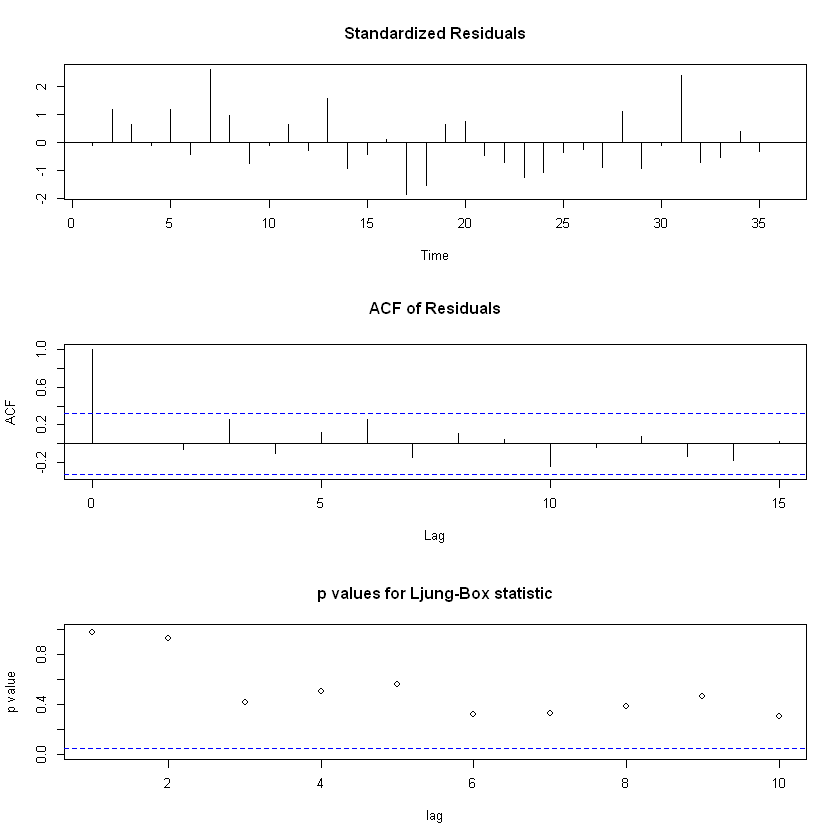

In [66]:
tsdiag(fit)

#### Desempeño

In [67]:
y <- tags$desempeñoN

In [68]:
ttest2(y[1:26],y[27:36])
t.test(y[1:27],y[28:36])

stat      p-value          dof 
 3.688397226  0.001558742 19.015435885


	Welch Two Sample t-test

data:  y[1:27] and y[28:36]
t = 3.4174, df = 15.061, p-value = 0.0038
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01212097 0.05226568
sample estimates:
mean of x mean of y 
0.3325207 0.3003274 


In [69]:
x= rep(0,36)
x[27:36]=1
fit = arima(y,order=c(1,0,0),xreg=x)

In [70]:
fit


Call:
arima(x = y, order = c(1, 0, 0), xreg = x)

Coefficients:
         ar1  intercept        x
      0.0103     0.3335  -0.0324
s.e.  0.1708     0.0049   0.0093

sigma^2 estimated as 0.0006088:  log likelihood = 82.19,  aic = -156.38

In [72]:
0.0324/0.0093

[1] 3.483871

In [71]:
(1-pnorm(abs(fit$coef)/sqrt(diag(fit$var.coef))))*2

ar1    intercept            x 
0.9521333424 0.0000000000 0.0004938173

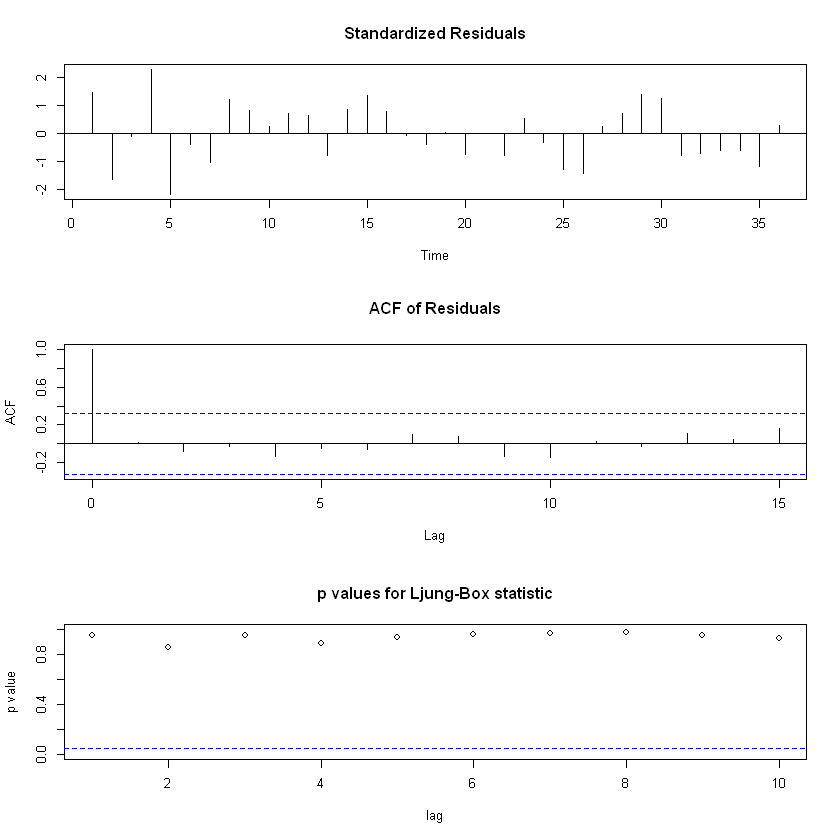

In [32]:
tsdiag(fit)

#### Diversidad

In [76]:
y <- tags$diversidadN

In [77]:
ttest2(y[1:26],y[27:36])
t.test(y[1:26],y[27:36])

stat    p-value        dof 
 0.5556464  0.5838391 22.9077399


	Welch Two Sample t-test

data:  y[1:26] and y[27:36]
t = 0.55565, df = 22.908, p-value = 0.5838
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02628352  0.04558263
sample estimates:
mean of x mean of y 
0.1818117 0.1721621 


In [78]:
x= rep(0,36)
x[27:36]=1
fit = arima(y,order=c(1,0,0),xreg=x)

In [79]:
fit


Call:
arima(x = y, order = c(1, 0, 0), xreg = x)

Coefficients:
         ar1  intercept        x
      0.5666     0.1878  -0.0195
s.e.  0.1397     0.0187   0.0308

sigma^2 estimated as 0.001887:  log likelihood = 61.63,  aic = -115.26

In [80]:
(1-pnorm(abs(fit$coef)/sqrt(diag(fit$var.coef))))*2

ar1    intercept            x 
5.013001e-05 0.000000e+00 5.263691e-01

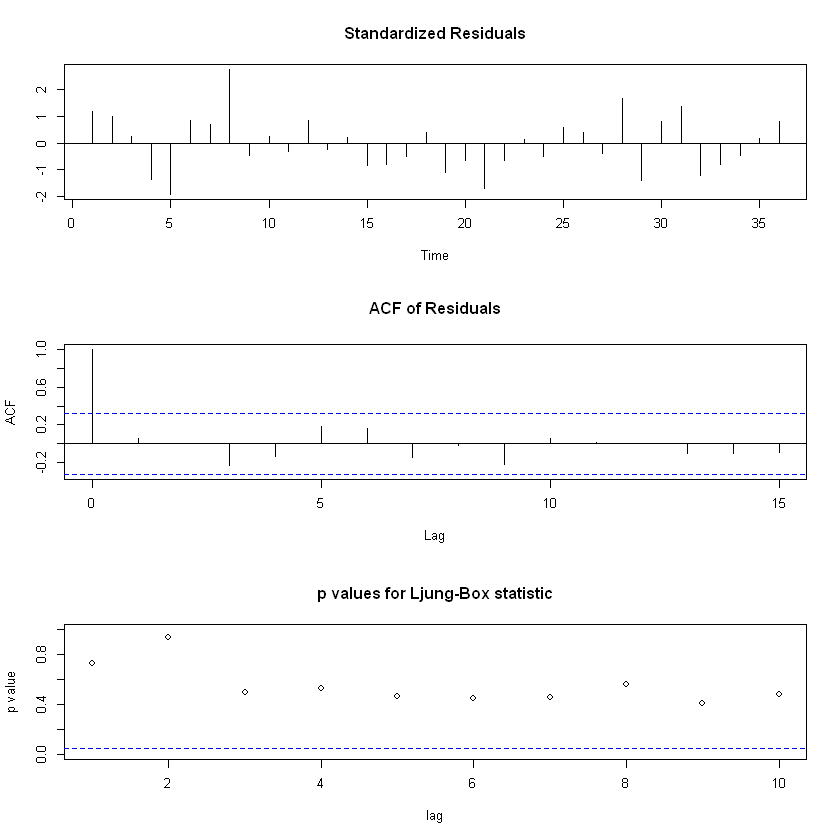

In [81]:
tsdiag(fit)

#### ¿¿ Por qué emoción no estaba??

In [82]:
y <- tags$emocionN

In [83]:
ttest2(y[1:26],y[27:36])
t.test(y[1:26],y[27:36])

stat       p-value           dof 
-7.909404e+00  2.137741e-07  1.879622e+01


	Welch Two Sample t-test

data:  y[1:26] and y[27:36]
t = -7.9094, df = 18.796, p-value = 2.138e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.15706012 -0.09129179
sample estimates:
mean of x mean of y 
0.3100402 0.4342161 


In [84]:
x= rep(0,36)
x[27:36]=1
fit = arima(y,order=c(1,0,0),xreg=x)

In [85]:
fit


Call:
arima(x = y, order = c(1, 0, 0), xreg = x)

Coefficients:
         ar1  intercept       x
      0.4654     0.3110  0.1177
s.e.  0.1467     0.0136  0.0240

sigma^2 estimated as 0.001488:  log likelihood = 65.98,  aic = -123.96

In [86]:
0.1177/0.0240

[1] 4.904167

In [43]:
(1-pnorm(abs(fit$coef)/sqrt(diag(fit$var.coef))))*2

ar1    intercept            x 
1.507109e-03 0.000000e+00 8.841137e-07

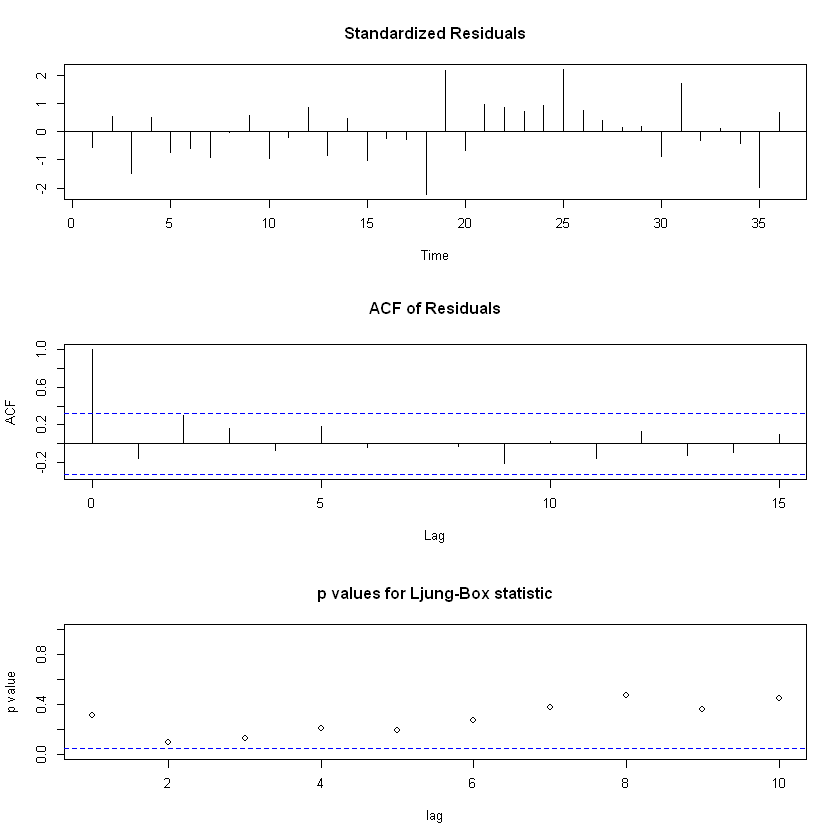

In [44]:
tsdiag(fit)